In [1]:
%load_ext autoreload
%autoreload 2

import time

import matplotlib.pyplot as plt

from algorithm_analysis import algorithms
from algorithm_analysis.benchmark import BROKEN_COMPONENTS, BROKEN_COMPONENTS_NON_STATIONARY, \
    BROKEN_COMPONENTS_WEAK_STATIONARY
from algorithm_analysis.plotting import plot_episode_length_over_time_tabular, plot_episode_reward_over_time_tabular, scatter_episode_length_over_time_tabular, scatter_episode_reward_over_time_tabular
from envs.broken_components import BrokenComponentsEnv

In [2]:
t0 = time.monotonic()
components_list = BROKEN_COMPONENTS_WEAK_STATIONARY[4]
print(f'Time until {len(components_list)} components are generated: {time.monotonic()-t0}')
# env = BrokenComponentsEnv(components_list, dh_data_generation='GARCH')
# env = gym.make('Taxi-v3')
labels = ['old', 'new']
envs = []
envs.append(BrokenComponentsEnv(components_list, dh_data_generation='GARCH'))
envs.append(BrokenComponentsEnv(components_list, dh_data_generation='GARCH', hidden_states=True, transition_matrix_path='data/transition_matrix/transition_matrix_approx.csv'))
print(f'Time until envs are ready: {time.monotonic()-t0}')

Time until 11 components are generated: 0.0
Time until env is ready: 1.4220000000059372


In [8]:
discount_rates = [0.8, 0.9]
learning_rates = [0.2]
trace_decays = [0.0]
num_plots = 2
total_runs = len(discount_rates) * len(learning_rates)
episodes = 300


100%|██████████| 300/300 [11:02<00:00,  2.21s/it]


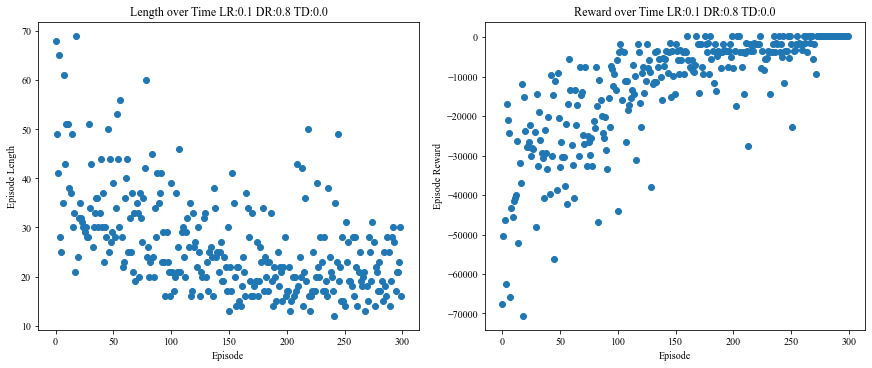

100%|██████████| 300/300 [14:47<00:00,  2.96s/it]


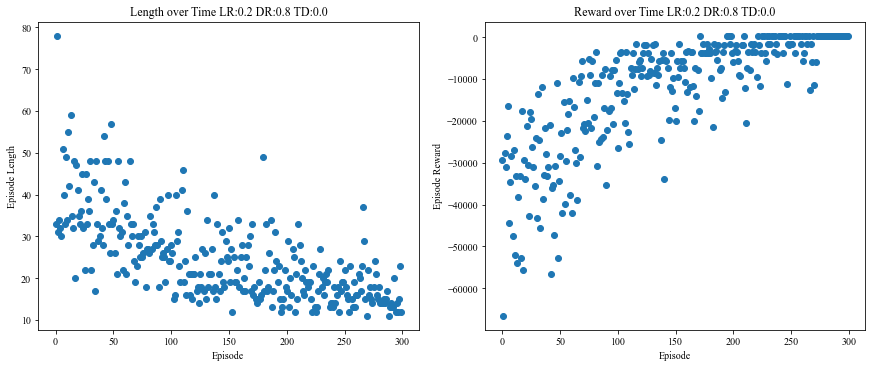

100%|██████████| 300/300 [16:23<00:00,  3.28s/it]


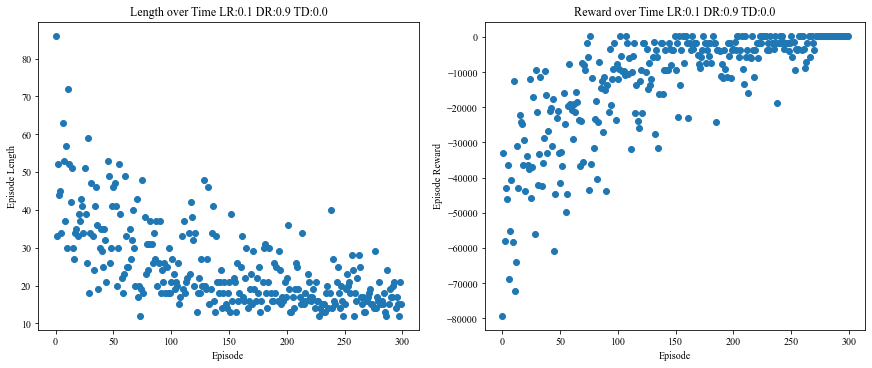

100%|██████████| 300/300 [12:15<00:00,  2.45s/it]


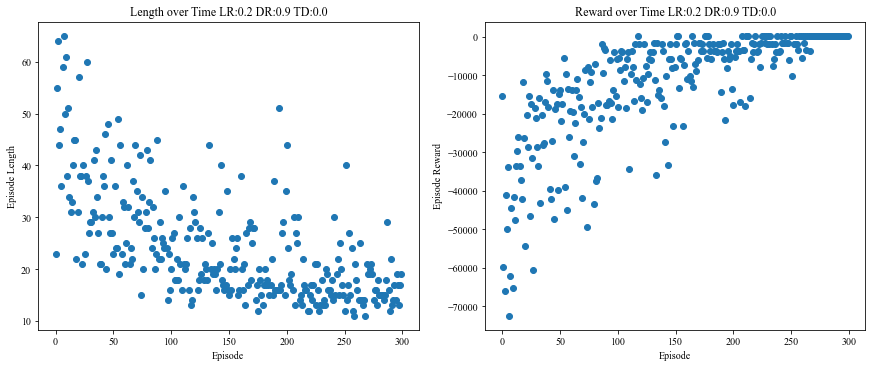

Time until all plots are ready: 3279.2660000000033


In [9]:
t0 = time.monotonic()
for i, discount_rate in enumerate(discount_rates):
    for j, learning_rate in enumerate(learning_rates):
        for k, trace_decay in enumerate(trace_decays):
            for l, env in enumerate(envs):
                fig, axs = plt.subplots(1, num_plots, figsize=(12, 5), constrained_layout=True)
                metric = algorithms.run_single_estimator('qlearning', env, env.observation_space.n, env.action_space.n, episodes=episodes,
                                    learning_rate=learning_rate, trace_decay=trace_decay, discount_rate=discount_rate)
                #plot_episode_length_over_time_tabular(axs[0], metric, smoothing_window=5)
                #plot_episode_reward_over_time_tabular(axs[1], metric, smoothing_window=5)
                scatter_episode_length_over_time_tabular(axs[0], metric)
                scatter_episode_reward_over_time_tabular(axs[1], metric)
                
                plt.savefig(f'tabularplots/qlearningnonstat-model={labels[l]}-dr={discount_rate}-lr={learning_rate}-tr={trace_decay}.png', dpi=300, bbox_inches='tight')
                plt.show()


print(f'Time until all plots are ready: {time.monotonic()-t0}')

100%|██████████| 300/300 [08:56<00:00,  1.79s/it]


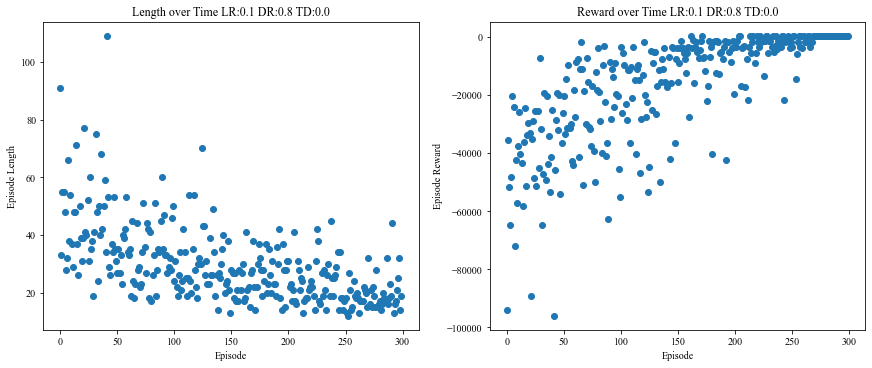

100%|██████████| 300/300 [10:16<00:00,  2.05s/it]


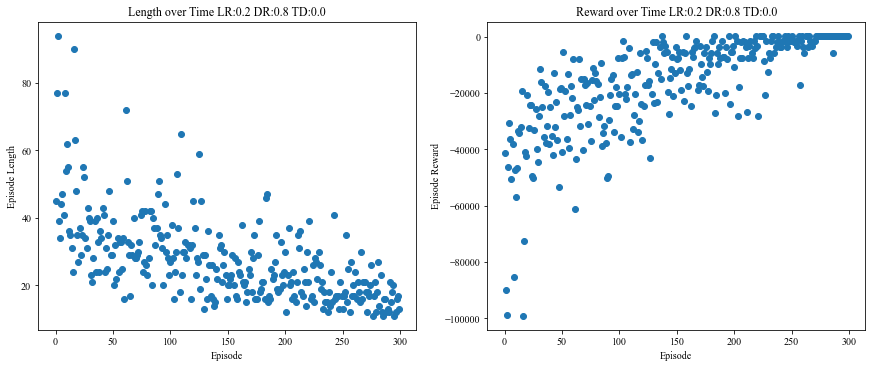

100%|██████████| 300/300 [10:13<00:00,  2.05s/it]


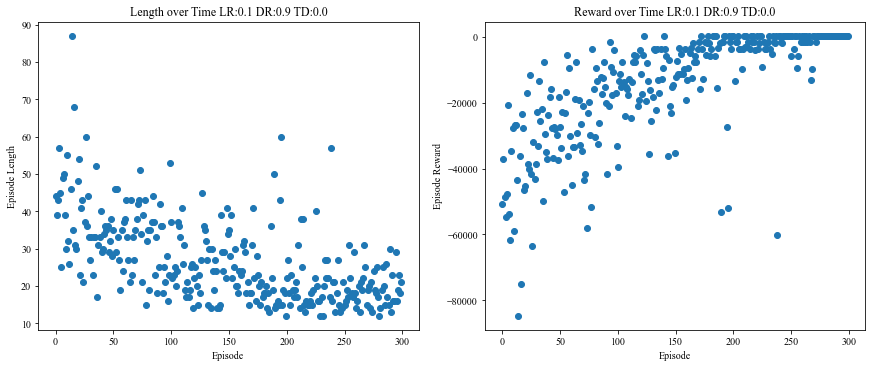

100%|██████████| 300/300 [10:14<00:00,  2.05s/it]


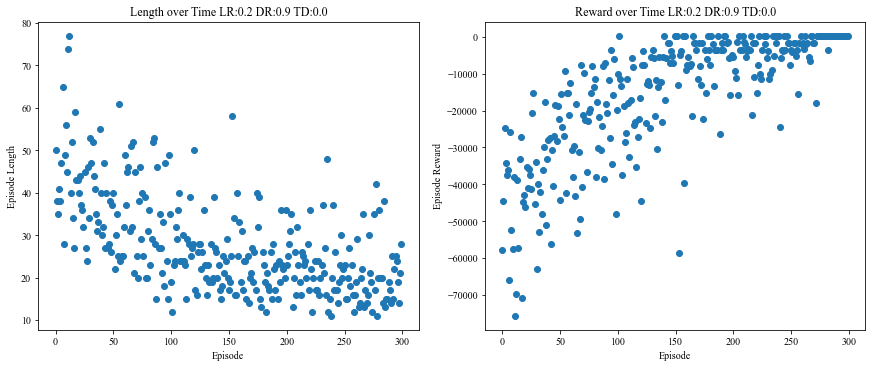

Time until all plots are ready: 2388.7810000000027


In [10]:
t0 = time.monotonic()
for i, discount_rate in enumerate(discount_rates):
    for j, learning_rate in enumerate(learning_rates):
        for k, trace_decay in enumerate(trace_decays):
            for l, env in enumerate(envs):
                fig, axs = plt.subplots(1, num_plots, figsize=(12, 5), constrained_layout=True)
                metric = algorithms.run_double_estimator('qlearning', env, env.observation_space.n, env.action_space.n, episodes=episodes,
                                    learning_rate=learning_rate, trace_decay=trace_decay, discount_rate=discount_rate)
                #plot_episode_length_over_time_tabular(axs[0], metric, smoothing_window=5)
                #plot_episode_reward_over_time_tabular(axs[1], metric, smoothing_window=5)
                scatter_episode_length_over_time_tabular(axs[0], metric)
                scatter_episode_reward_over_time_tabular(axs[1], metric)

                plt.savefig(f'tabularplots/doubleqlearning-model={labels[l]}-dr={discount_rate}-lr={learning_rate}-tr={trace_decay}.png', dpi=300, bbox_inches='tight')
                plt.show()


print(f'Time until all plots are ready: {time.monotonic()-t0}')

100%|██████████| 300/300 [10:08<00:00,  2.03s/it]


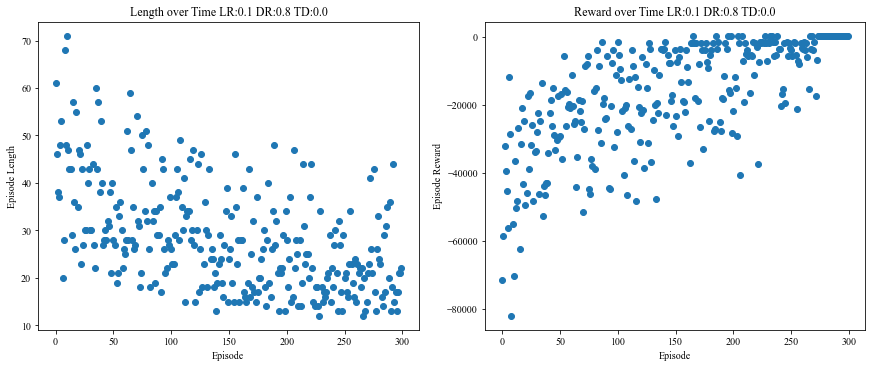

100%|██████████| 300/300 [10:30<00:00,  2.10s/it]


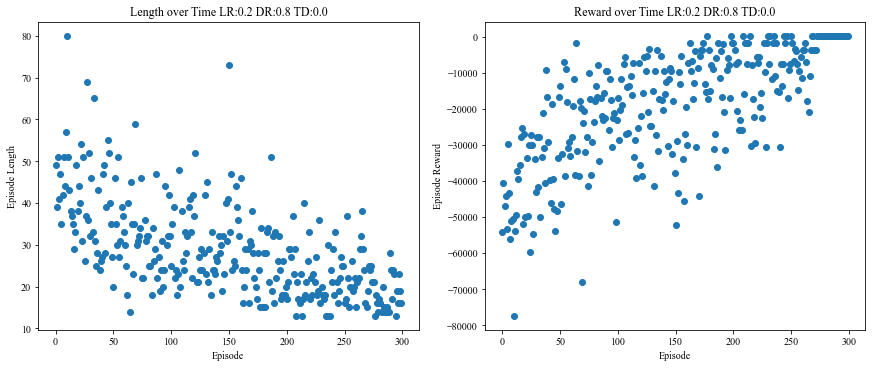

100%|██████████| 300/300 [13:37<00:00,  2.72s/it]


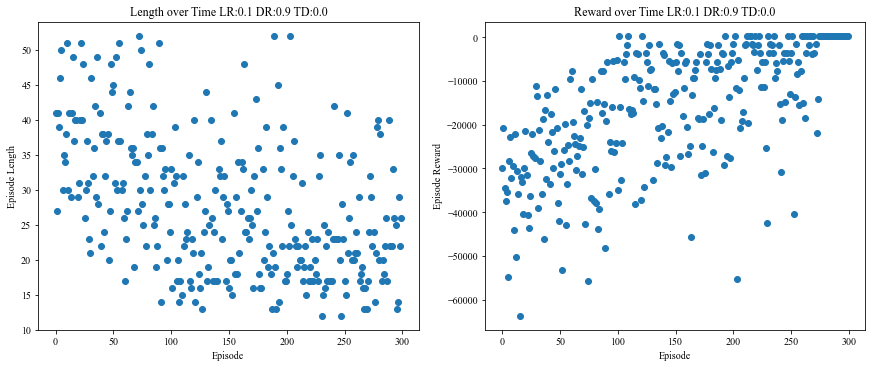

100%|██████████| 300/300 [11:34<00:00,  2.32s/it]


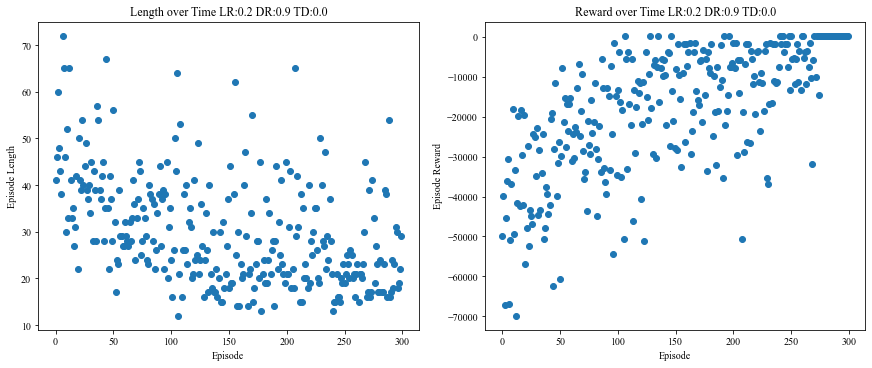

Time until all plots are ready: 2758.6410000000033


In [11]:
t0 = time.monotonic()
for i, discount_rate in enumerate(discount_rates):
    for j, learning_rate in enumerate(learning_rates):
        for k, trace_decay in enumerate(trace_decays):
            for l, env in enumerate(envs):
                fig, axs = plt.subplots(1, num_plots, figsize=(12, 5), constrained_layout=True)
                metric = algorithms.run_single_estimator('sarsa', env, env.observation_space.n, env.action_space.n, episodes=episodes,
                                    learning_rate=learning_rate, trace_decay=trace_decay, discount_rate=discount_rate)
                #plot_episode_length_over_time_tabular(axs[0], metric, smoothing_window=5)
                #plot_episode_reward_over_time_tabular(axs[1], metric, smoothing_window=5)
                scatter_episode_length_over_time_tabular(axs[0], metric)
                scatter_episode_reward_over_time_tabular(axs[1], metric)
                
                plt.savefig(f'tabularplots/sarsa-model={labels[l]}-dr={discount_rate}-lr={learning_rate}-tr={trace_decay}.png', dpi=300, bbox_inches='tight')
                plt.show()


print(f'Time until all plots are ready: {time.monotonic()-t0}')

100%|██████████| 300/300 [10:43<00:00,  2.15s/it]
Time until plots are ready: 3027.156999999992


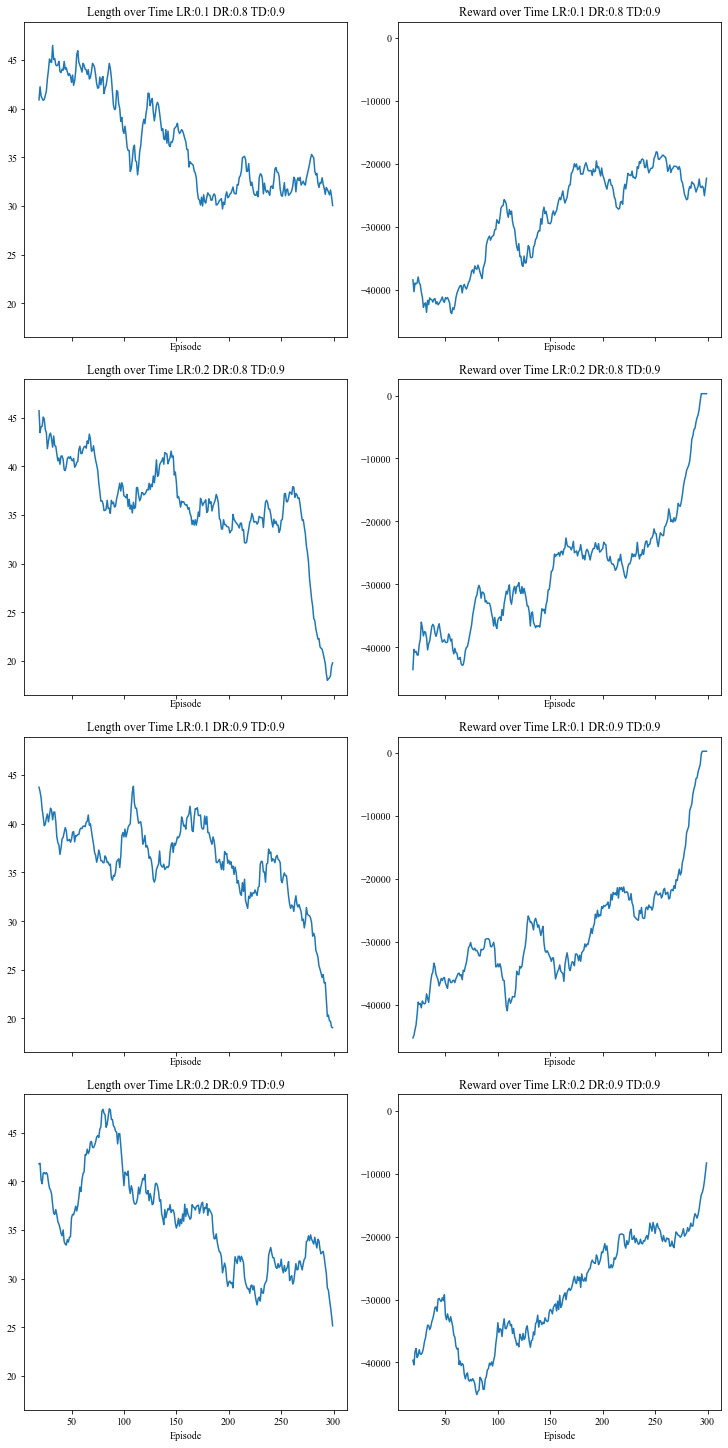

In [12]:
t0 = time.monotonic()
fig, axs = plt.subplots(total_runs, num_plots, figsize=(10, 5*total_runs), constrained_layout=True, sharex=True, sharey='col')
for i, discount_rate in enumerate(discount_rates):
    for j, learning_rate in enumerate(learning_rates):
        for l, env in enumerate(envs):
            metric = algorithms.run_single_estimator('sarsa', env, env.observation_space.n, env.action_space.n, episodes=episodes,
                                learning_rate=learning_rate, discount_rate=discount_rate)
            ax_row = i * len(learning_rates) + j
            plot_episode_length_over_time_tabular(axs[ax_row, 0], metric, smoothing_window=20)
            plot_episode_reward_over_time_tabular(axs[ax_row, 1], metric, smoothing_window=20)


print(f'Time until plots are ready: {time.monotonic()-t0}')
plt.savefig(f'tabularplots/timelines.png', dpi=300, bbox_inches='tight')
plt.show()
